    
# DATA DAY TRAINING: Intro to Python

Topics to cover:
(i) Import data (from web and CSV files)
(ii) Clean and merge datasets
(iii) Exploratory data analysis
(iv) Visualization and modelling

#### 1. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import statsmodels.api as sm
import geopandas as gpd
from pandas_datareader import wb

In [301]:
# Add back condensed text on how to import modules

#### 2. Quick demo of pulling WDI data from the web
We're using Pandas Datareader: a third-party library that makes it easy to pull data from APIs into a Pandas dataframe.

Use it to pull live data from Yahoo! Finance, World Bank and others.


| Function | Task Performed |
|----|---|
| wb.get_countries()  | List available countries, with their country codes, income levels etc. |
| wb.search()  | Query the available indicators using a search term. |
| wb.WorldBankReader()  | A class for downloading data series. |


In [302]:
# Find the GNI per capita indicator, get its ID number

result = wb.search(string="GNI per capita, Atlas",field = 'name')
result

,id,name,source,sourceNote,sourceOrganization,topics,unit
8496,NY.GNP.PCAP.CD,"GNI per capita, Atlas method (current US$)",World Development Indicators,GNI per capita (formerly GNP per capita) is th...,"World Bank national accounts data, and OECD Na...",Economy & Growth,


In [303]:
# Make a note of the indicator ID
GNI_ID = 'NY.GNP.PCAP.CD'

In [304]:
# Get a list of countries and clean it up

countries = wb.get_countries()
countries = countries[countries.incomeLevel != 'Aggregates']
countries = countries[['name', 'iso3c','incomeLevel']]
countries.head()

,name,iso3c,incomeLevel
0,Aruba,ABW,High income
1,Afghanistan,AFG,Low income
3,Angola,AGO,Lower middle income
4,Albania,ALB,Upper middle income
5,Andorra,AND,High income


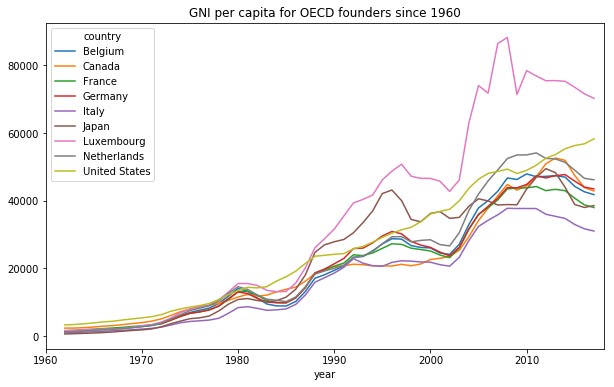

In [305]:
# Let's plot GNI per capita since 1960 for the OECD countries

OECD_founders = ['Belgium','France','Germany','Italy','Luxembourg','Netherlands','United States',
                'Canada','Japan']
OECD_founder_codes = countries.iso3c[countries.name.isin(OECD_founders)]

# Create a reader object, pass it the data ID and country codes we want

reader = wb.WorldBankReader(symbols=GNI_ID,countries = OECD_founder_codes,start=1960)
GNI_capita = reader.read()

# Clean and plot the data

GNI_capita = GNI_capita.unstack(level=0)[GNI_ID]
GNI_capita.plot(figsize=[10,6])
plt.title('GNI per capita for OECD founders since 1960');

#### 2. Combine income and life satisfaction data for 2015
Incomes have risen sharply. But does that translate into more life satisfaction, and are richer countries happier?

Let's do a cross-sectional analysis for a single year. 

#### 2.1 Import and clean up the OECD life satisfaction survey

In [348]:
# Read data from a CSV file using Pandas

CSV_path = 'https://raw.githubusercontent.com/worldbank/python-101/master/notebooks/BLI2015.csv'
life_sat = pd.read_csv(CSV_path)

In [349]:
life_sat = life_sat[(life_sat.Inequality == "Total") & (life_sat.Indicator == 'Life satisfaction')]
life_sat = life_sat[['Country','LOCATION','Value']]

In [350]:
# Remove two values that don't match across datasets

life_sat = life_sat[~life_sat.Country.str.contains("OECD")]
life_sat = life_sat[~life_sat.Country.str.contains("Korea")]

# Rename columns
life_sat.rename(columns = {'Country': 'country', 'LOCATION':'iso3c', 'Value':'life_satisfaction'},inplace=True)

In [351]:
# Inspect the dataframe
life_sat.head()

,country,iso3c,life_satisfaction
2669,Australia,AUS,7.3
2670,Austria,AUT,6.9
2671,Belgium,BEL,6.9
2672,Canada,CAN,7.3
2673,Czech Republic,CZE,6.5


#### 2.2 Get GNI per capita for OECD countries in 2015

In [352]:
# Read in the data

OECD_country_codes = life_sat.iso3c

reader = wb.WorldBankReader(symbols = GNI_ID, countries = OECD_country_codes, start = 2015, end = 2015)
GNI_OECD = reader.read()

In [353]:
# Tidy and preview

GNI_OECD = GNI_OECD[GNI_ID].unstack(level=0).T
GNI_OECD.rename(columns={'2015':'GNI_per_capita'},inplace=True)

GNI_OECD.head()

year,GNI_per_capita
country,
Australia,60360
Austria,47630
Belgium,44230
Brazil,10090
Canada,47460


#### 2.3 Merge the datasets

In [355]:
df = pd.merge(life_sat, GNI_OECD,on='country')
df = df[['country','life_satisfaction','GNI_per_capita']]
df.set_index('country',inplace=True)

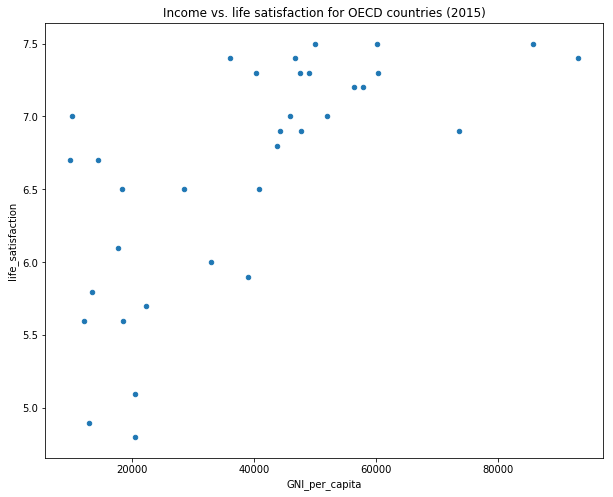

In [357]:
fig,ax = plt.subplots(figsize = [10,8])
df.plot(kind='scatter',x='GNI_per_capita',y='life_satisfaction',ax=ax)
plt.title('Income vs. life satisfaction for OECD countries (2015)');

### NOTE: Plot a smaller number of countries, but with their labels attached? Would be good to see which country is which (and spot the outliers)

## EXERCISES:

We have looked at the tools Python has for data processing and cleaning, 
now lets explore the available functionality for statistical exploration of the data. 
At this stage, we want to do things like:
- check distribution of the variables using *df.describe()*
- get value counts, mostly useful for categorical variables: *df[col_name].value_counts()*
- sort the data: df.sort_values


Exercise 1: Display descriptive Statistics for the whole dataset (using dataframe.describe()

In [ ]:
#Your code here: 




Exercise 2: What is the maximum GDP per capita in 2015? (using dataframe.col_name.max()

In [ ]:
#Your code here:

In [29]:
#SAMPLE CODE:

#Which country has maximum value for life satisfaction in 2015 
max_sat = (df[df.inequality == 'Total'].life_sat_score.idxmax())

print(df[df.inequality=='Total']
.loc[max_sat]
.country)

Switzerland


Exercise 3: Which country has the minimum GDP per capita in 2015? (HINT: use column name=gdp_per_capita and idmin() 

In [ ]:
# Your code here: 

